In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
from scipy.stats import binom

import cvfunc
import cv2
import symmetry

from tqdm import tqdm
from glob import glob
import os

**Reading and extracting colors**

In [12]:
path = "sample/*.png"

In [13]:
sorted(glob(path))

['sample/East_day105_16Apr2013_N.png',
 'sample/East_day105_16Apr2013_S.png',
 'sample/East_day105_16Apr2013_mirror.png',
 'sample/Office_day261_18Sep2013_mirror.png']

In [14]:
pictures = [cvfunc.reduce_colors(cv2.imread(file),n=u) for file,u in zip(sorted(glob(path)),[6,6,6,5])]

In [15]:
colors = [cvfunc.get_colors(img) for img in pictures]

In [16]:
colors[0]

(array([[2.7138885e-04, 2.7138885e-04, 2.7138885e-04],
        [3.4305146e-01, 3.6461803e-01, 4.0879607e-01],
        [6.4359093e-01, 8.2812446e-01, 7.0244545e-01],
        [7.7253091e-01, 9.9998671e-01, 8.4704089e-01],
        [9.4073594e-01, 6.8211913e-01, 2.6240980e-04],
        [1.0000000e+00, 1.0000000e+00, 1.0000000e+00]], dtype=float32),
 array([ 289, 1822,  251, 1473, 1076, 5889]))

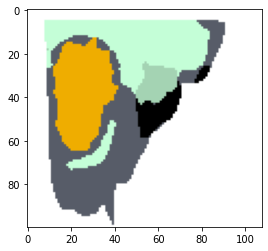

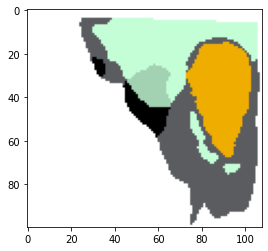

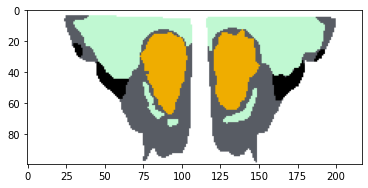

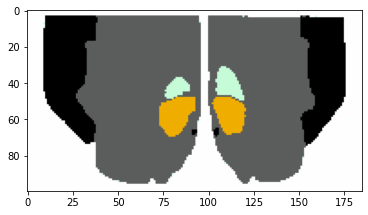

In [17]:
for img in pictures:
    plt.figure()
    plt.imshow(img)

In [18]:
test_color = colors[0][0]

In [19]:
test_color[:-1]

array([[2.7138885e-04, 2.7138885e-04, 2.7138885e-04],
       [3.4305146e-01, 3.6461803e-01, 4.0879607e-01],
       [6.4359093e-01, 8.2812446e-01, 7.0244545e-01],
       [7.7253091e-01, 9.9998671e-01, 8.4704089e-01],
       [9.4073594e-01, 6.8211913e-01, 2.6240980e-04]], dtype=float32)

In [20]:
img = pictures[0]

In [21]:
dict(zip(range(len(color)),color))

NameError: name 'color' is not defined

In [159]:
def mask_by_color(img,color):
    return (cvfunc.color_threshold(img,[color],[color])/255).astype(np.uint8)

In [160]:
img_mask = (cvfunc.color_threshold(img,[color[-1]],[color[-1]],invert=True)/255.0).astype(np.uint8)

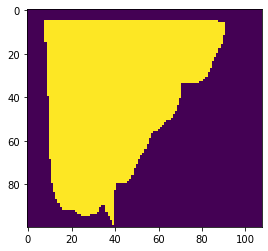

In [161]:
plt.imshow(img_mask)

In [155]:
M = np.bitwise_and(img_mask,img_mask[:,::-1]).sum()

In [179]:
def symmetric_and(img_mask):
    return np.bitwise_and(img_mask,img_mask[:,::-1]).sum()/2

In [180]:
symmetry_score = sum([symmetric_and(mask_by_color(img,color)) for color in test_color[:-1]])

In [181]:
symmetry_score # Calculated value

523.0

In [195]:
M/n # Expected value

512.4

In [192]:
def p_value(score,M,n):
    P = binom(M,1/n)
    if score > P.expect():
        return P.cdf(score-P.expect())
    else:
        return P.cdf(score)

In [194]:
p_value(symmetry_score,M,n)*2 #Probability of null hypothesis being true

3.3282407062038334e-227